In [194]:
import pandas as np
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [195]:
tick = yf.Ticker("TCS.NS")
stock_hist = tick.history("max")
df = stock_hist.Close

In [196]:
df = df.to_frame().reset_index()
#df

In [197]:

import pandas as pd


In [198]:
df_for_training = df[["Close"]]

In [199]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#df_for_training = sc.fit_transform(df_for_training)


In [200]:
#df_for_training

In [201]:
# Creating dataset
train_X = []
#train_Y = []
#n_past = 200
n_past = 14
n_future = 1

In [202]:
df_for_training = df_for_training.values

In [203]:
for i in range(len(df_for_training)-n_past-1):
		a = df_for_training[i:(i+n_past), 0]   ###i=0, 0,1,2,3-----99   100 
		train_X.append(a)
		

In [204]:
train_X = np.array(train_X)

In [205]:
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], n_future)
train_X.shape

(4830, 14, 1)

In [206]:
train_X[-1:].shape

(1, 14, 1)

In [207]:
train_X[-1].reshape(-1, 1).shape

(14, 1)

In [208]:
temp = train_X[-1].reshape(-1, 1)

In [209]:
#temp

In [210]:
temp = sc.fit_transform(temp)

In [211]:
#temp_for = temp
li = []

In [212]:
#temp_for

In [213]:
# loading model from tensorflow import keras 
# model using 14steps
#from tensorflow import keras
#model = keras.models.load_model("de_lstm_14days.h5")

In [214]:
# creating for loop for n number of prediction
def pred_and_load(days, temp_for):
    from tensorflow import keras
    timestamp = n_past
    model = keras.models.load_model("de_lstm_14days.h5")
    li = []
    for i in range(days):
        x_input_for = temp_for.reshape(1, temp_for.shape[0],1)
        pred_for = model.predict(x_input_for).flatten()
        li.append(pred_for)
        next_for = np.append(temp_for,pred_for)
        temp_for = next_for[-timestamp:]
    return li

In [215]:
days = 365

In [216]:
#li

In [217]:
li = pred_and_load(days, temp)

In [218]:
#li

In [219]:
arr = np.array(li)

In [220]:
#arr

In [221]:
y_pred_future = sc.inverse_transform(arr)

In [222]:
#y_pred_future

In [223]:
y_pred_future = y_pred_future.flatten()
#y_pred_future

In [224]:
training_dates = pd.to_datetime(df["Date"])

In [225]:
forecast_period_date = pd.date_range(list(training_dates)[-1], periods=days, freq="1d").tolist()

In [226]:
forecast_dates = []
for time_i in forecast_period_date:
   forecast_dates.append(time_i.date())

In [227]:
df_future = pd.DataFrame({"Date":np.array(forecast_dates), "Close":y_pred_future})

In [228]:
original = stock_hist["Close"]
original = original.to_frame().reset_index()

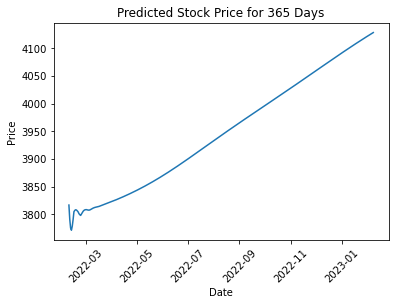

In [229]:
plt.title(f"Predicted Stock Price for {days} Days")
plt.plot(forecast_dates,  y_pred_future)
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [230]:
from datetime import datetime, timedelta
if days < 365:
    back_days = 730
else:
    back_days = 1460

past_date = datetime.now() - timedelta(back_days)
filter_date = datetime.strftime(past_date.date(), "%Y-%m-%d")
shorted = original[original['Date'] > filter_date]

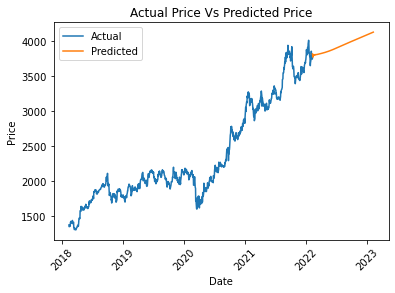

In [231]:
plt.title("Actual Price Vs Predicted Price")
plt.plot(shorted['Date'], shorted['Close'], label = 'Actual')
plt.plot(df_future["Date"], df_future["Close"], label="Predicted")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [232]:
df_future

,Date,Close
0,2022-02-09,3816.719971
1,2022-02-10,3791.074463
2,2022-02-11,3775.348389
3,2022-02-12,3771.241699
4,2022-02-13,3778.502441
...,...,...
360,2023-02-04,4124.567383
361,2023-02-05,4125.504883
362,2023-02-06,4126.439453
363,2023-02-07,4127.370605
